# Enunciado
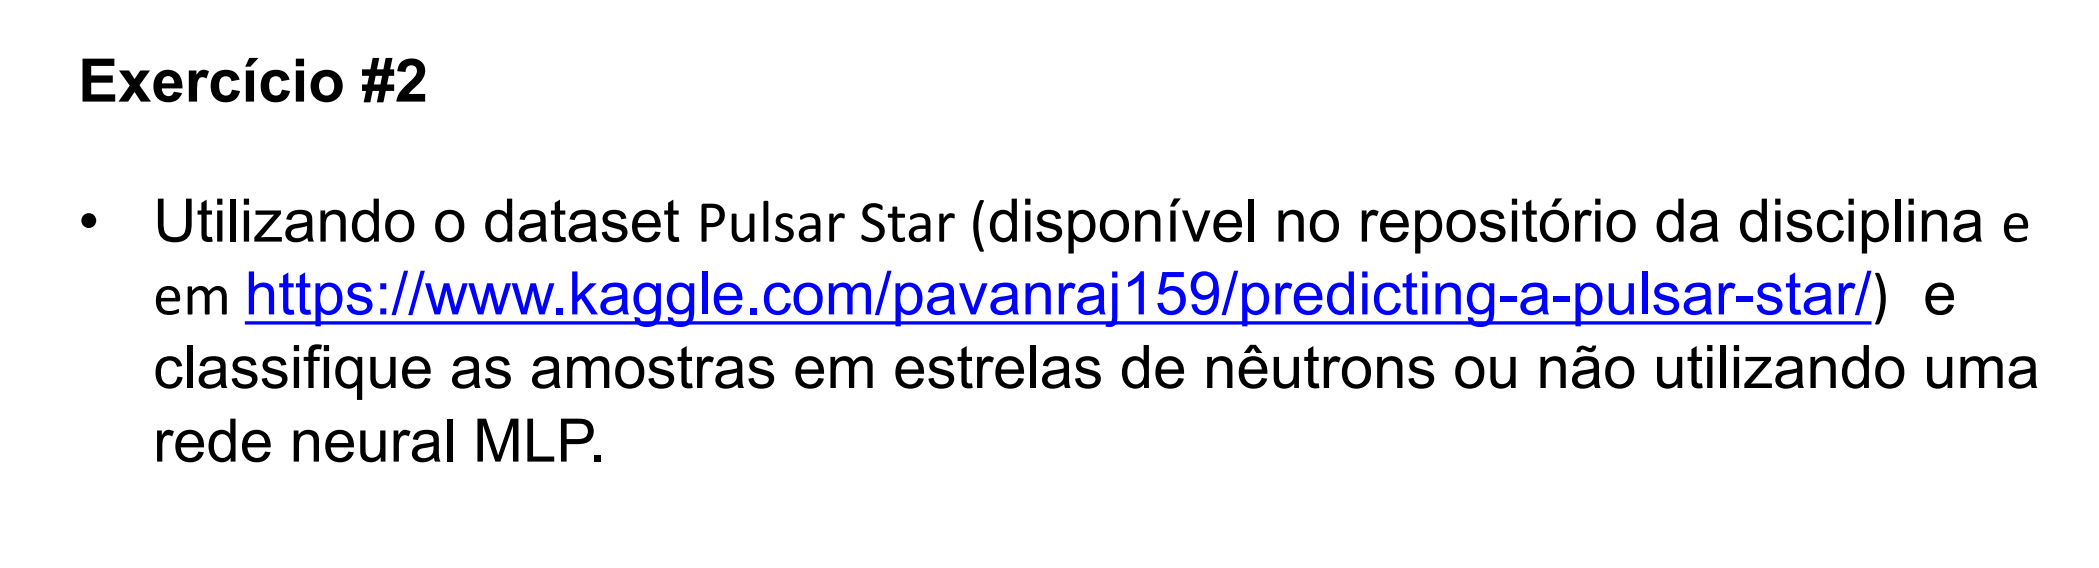

# Introdução

Fonte do enunciado não funcionou, achei a abaixo similar. 

https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate

## Descrição das colunas

*Trecho traduzido da fonte* - Cada candidato é descrito por 8 variáveis ​​contínuas e uma única variável de classe. As quatro primeiras são estatísticas simples obtidas do perfil de pulso integrado (perfil dobrado). Esta é uma matriz de variáveis ​​contínuas que descrevem uma versão do sinal resolvida em longitude que foi calculada a média em tempo e frequência. As quatro variáveis ​​restantes são obtidas de forma semelhante a partir da curva DM-SNR. Estes são resumidos abaixo:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class (target_class)

## Comentários Iniciais

O dataset fornecido pelo professor já veio com o processo de *Feature Engineering* executado.

Usei um seed de 42 para replicação dos resultados.

# Bicliotecas e Funções

In [33]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

In [34]:
import random

# Define a semente com o valor 42
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Código

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/KValim/Projetcs/main/FIAP/deep%20learning%20I/pulsar_star/pulsar_stars.csv')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [36]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


## Correlação

[Text(0.5, 0, ' Mean of the integrated profile'),
 Text(1.5, 0, ' Standard deviation of the integrated profile'),
 Text(2.5, 0, ' Excess kurtosis of the integrated profile'),
 Text(3.5, 0, ' Skewness of the integrated profile'),
 Text(4.5, 0, ' Mean of the DM-SNR curve'),
 Text(5.5, 0, ' Standard deviation of the DM-SNR curve'),
 Text(6.5, 0, ' Excess kurtosis of the DM-SNR curve'),
 Text(7.5, 0, ' Skewness of the DM-SNR curve'),
 Text(8.5, 0, 'target_class')]

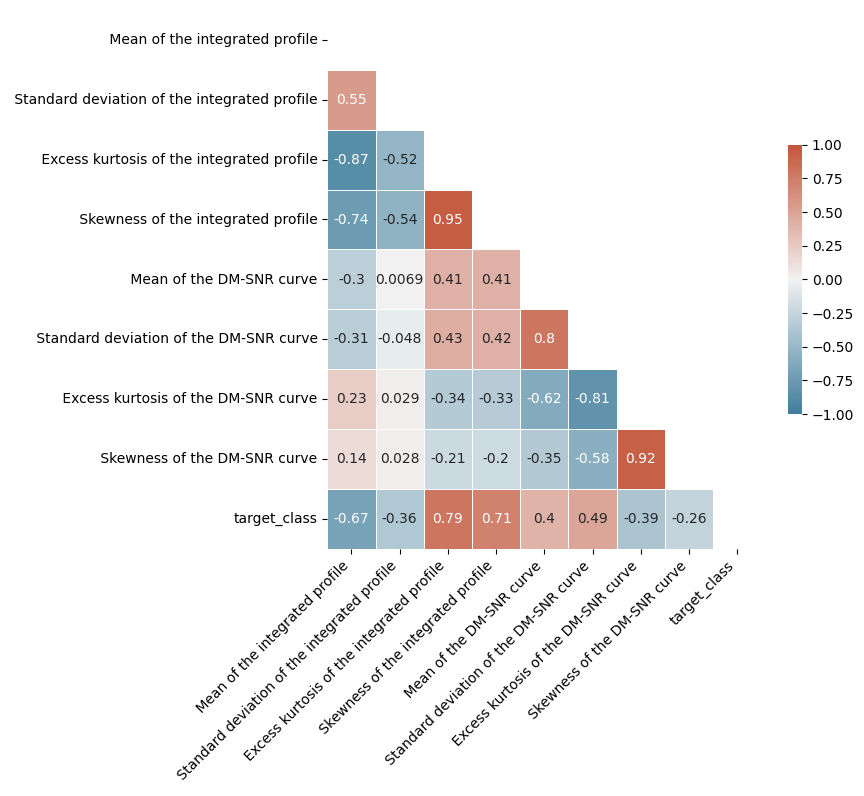

In [38]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (7, 7))
corr_mat = df.corr()
ax = sns.heatmap(corr_mat, 
                 vmin=-1, vmax=1, center=0, 
                 xticklabels = corr_mat.columns, 
                 yticklabels = corr_mat.columns, 
                 annot=True,
                 cmap=cmap,
                 linewidths=.5,
                 mask=mask,
                 cbar_kws={"shrink": .5})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Exces kurtosis of the integrated profile e Skewnesss of the integrated profile tem baixa correlação com a variável target_class.

Talvez seja melhor retira-las do dataset para evitar enviezamento.

## Plots

In [39]:
continous_features = list(set(df.columns) - set(['target_class']))
continous_features.sort()
continous_features

[' Excess kurtosis of the DM-SNR curve',
 ' Excess kurtosis of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Mean of the integrated profile',
 ' Skewness of the DM-SNR curve',
 ' Skewness of the integrated profile',
 ' Standard deviation of the DM-SNR curve',
 ' Standard deviation of the integrated profile']

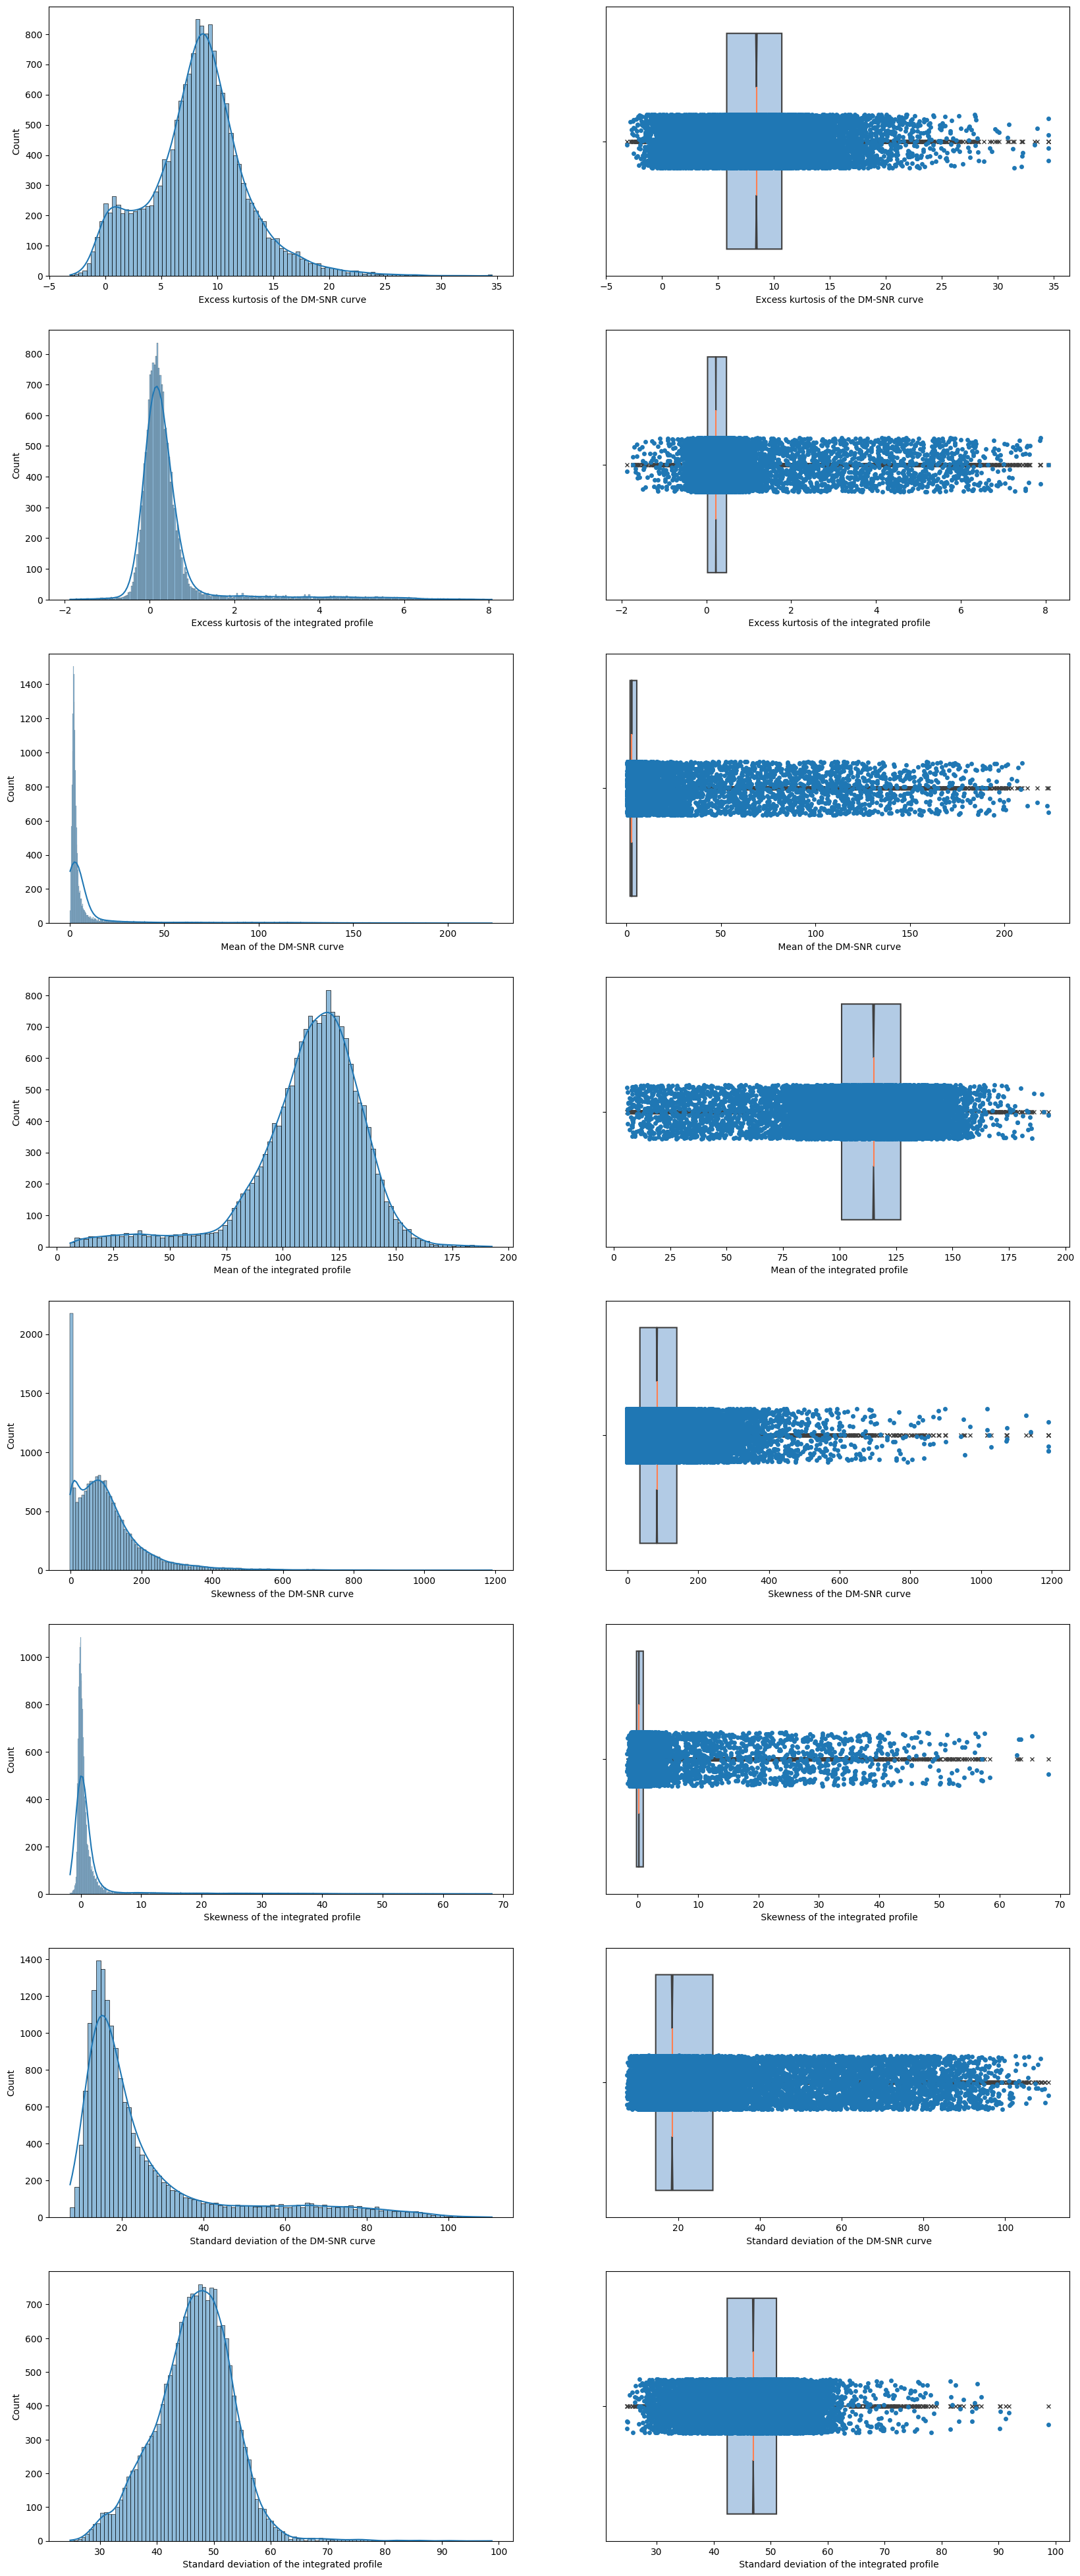

In [40]:
tamanho_figsize = len(continous_features)
fig, axes = plt.subplots(nrows=len(continous_features),ncols=2,  figsize=(20, 50))

for i in range(len(continous_features)):
    feature = continous_features[i]
    # plt.figure(figsize = (5, 5))
    data=df.copy()
    
    sns.histplot(x=data[feature], ax=axes[i][0], kde=True)
    sns.boxplot(x=data[feature], ax=axes[i][1], notch=True, showcaps=False, flierprops={"marker": "x"}, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"})
    # Gráfico de disperção
    sns.stripplot(x=data[feature], ax=axes[i][1]) 

Os gráficos boxplot demonstram que existem uma grande quantidade de outliers, que talvez diminuam a saúde do dataset para o treinamento.

## Split Train Test

In [41]:
# separa do dados em features e target
X = df.drop("target_class", axis=1)
y = df["target_class"]

In [42]:
# separa os dados de treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Em seguida, padronizaremos os dados, mudando a escala através do StandardScaler

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
epochs = 100

## Modelo 1

In [45]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(8,)))
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                288       
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Com o modelo criado, ele precisa ser treinado, e para economia de tempo, recursos operacionais e saúde do modelo (evitando overfitting), será utilizado um earlystopper de *patience* 10.

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

# add callbacks
earlystopper = EarlyStopping(monitor='val_loss',patience=10)

callbacks = [earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
224/224 [==============================] - 3s 5ms/step - loss: 0.2949 - accuracy: 0.9496 - val_loss: 0.1219 - val_accuracy: 0.9749
Epoch 2/100
224/224 [==============================] - 1s 4ms/step - loss: 0.0980 - accuracy: 0.9751 - val_loss: 0.0812 - val_accuracy: 0.9771
Epoch 3/100
224/224 [==============================] - 1s 3ms/step - loss: 0.0818 - accuracy: 0.9765 - val_loss: 0.0754 - val_accuracy: 0.9785
Epoch 4/100
224/224 [==============================] - 1s 4ms/step - loss: 0.0780 - accuracy: 0.9774 - val_loss: 0.0726 - val_accuracy: 0.9791
Epoch 5/100
224/224 [==============================] - 1s 4ms/step - loss: 0.0762 - accuracy: 0.9774 - val_loss: 0.0716 - val_accuracy: 0.9791
Epoch 6/100
224/224 [==============================] - 1s 4ms/step - loss: 0.0748 - accuracy: 0.9777 - val_loss: 0.0705 - val_accuracy: 0.9791
Epoch 7/100
224/224 [==============================] - 1s 3ms/step - loss: 0.0739 - accuracy: 0.9781 - val_loss: 0.0701 - val_accuracy: 0.9799

In [30]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

112/112 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.93      0.87      0.90       321

    accuracy                           0.98      3580
   macro avg       0.96      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



## Conclusão parcial

O modelo obteve um resultado satisfatório de 98% de acurácia segundo a métrica f1-score.

Mas como são muitas combinações possíveis de camadas, quantidade de neuronios, ativações, etc., a seguir vou utilizar o método de GridSearch para acha um modelo ótimo.

## GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping

# definição do modelo
def create_model(num_layers=1, num_units=32, activation='relu'):
    model = Sequential()
    for _ in range(num_layers):
        model.add(Dense(num_units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# cria o wrapper
model_wrapper = KerasClassifier(build_fn=create_model, epochs=1, batch_size=32, verbose=0)

# parametros do gridsearch
params = {'num_layers': [1, 2], 
          'num_units': [8, 16, 32], 
          'activation': ['relu', 'tanh', 'sigmoid']}

# construção do gridsearch
grid = GridSearchCV(estimator=model_wrapper, param_grid=params, cv=5, n_jobs=-1, error_score='raise')

# callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callbacks = [earlystopper]

# fit the grid search
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=callbacks)

# summarize the results
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')


Best: 0.9773518443107605 using {'activation': 'tanh', 'num_layers': 2, 'num_units': 16}


# Conclusão
A acurácia do modelo ótimo foi praticamente a mesma que o primeiro modelo, mas escolhendo duas camaras tanh ao invés de uma relu.